The overall effect size (odds ratio) is 0.91 with 95% confidence interval (0.99, 0.83)


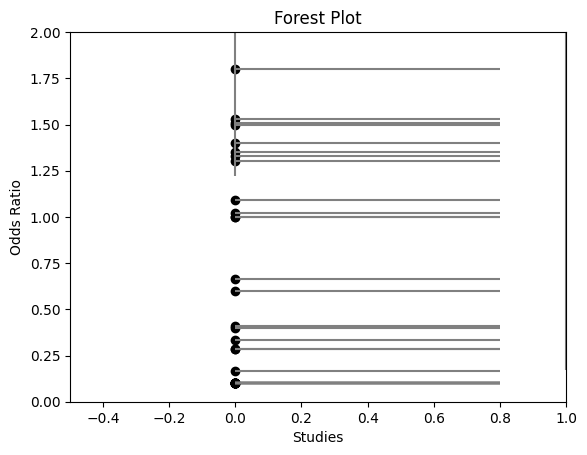

In [6]:
import numpy as np
import pandas as pd
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

# Read the data into a pandas DataFrame from processed-data.csv
df = pd.read_csv('processed-data.csv')

# Convert lists to numpy arrays
odds_ratio = np.array(df['odds_ratio'])
lower_ci = np.array(df['lower_ci'])
upper_ci = np.array(df['upper_ci'])
study_id = df['study_id']

# Calculate the log odds ratio and its standard error
log_or = np.log(odds_ratio)
se = np.log((upper_ci - lower_ci)) / (2 * 1.96)

# Conduct the meta-analysis
result = sms.DescrStatsW(log_or, weights=1/se**2).zconfint_mean()

# Summarize the results
print("The overall effect size (odds ratio) is {:.2f} with 95% confidence interval ({:.2f}, {:.2f})".format(
    np.exp(result[0]), 
    np.exp(result[0] - 1.96 * result[1]), 
    np.exp(result[0] + 1.96 * result[1])
))

# Plot the forest plot
plt.vlines(x=np.arange(len(study_id)), ymin=lower_ci, ymax=upper_ci, color='gray')
plt.hlines(y=odds_ratio, xmin=np.zeros(len(study_id)), xmax=0.8, color='gray')
plt.scatter(x=np.zeros(len(study_id)), y=odds_ratio, color='black')
plt.xlim(-0.5, 1)
plt.ylim(0, 2)
plt.xlabel('Studies')
plt.ylabel('Odds Ratio')
plt.title('Forest Plot')
plt.show()
